# Diagrams used for the report

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
from cued_sf2_lab.familiarisation import load_mat_img


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
lighthouse = lighthouse - 128.0

## Quantisation grid images

## LBT Quantisation Schemes

In [60]:
N = 16

r = 1.039
steps = np.zeros((N, N))
x = np.arange(N)
steps_lbt_grad = (r ** np.add.outer(x, x))


In [61]:
from compression import LBTCompression

scheme = LBTCompression(s=1.3, N=N)
image = lighthouse
Y = scheme.compress(image)

energies = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        energies[i, j] = (Y[i::N, j::N] ** 2).sum()

steps_lbt_energies = 1 / np.sqrt(energies)
steps_lbt_energies /= steps_lbt_energies[0, 1]

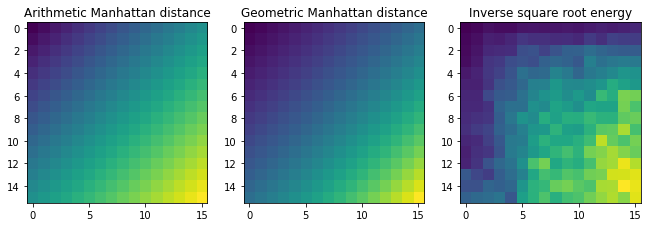

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 5))

ax[0].imshow(np.add.outer(x, x))
ax[0].set_title("Arithmetic Manhattan distance")
ax[1].imshow(steps_lbt_grad)
ax[1].set_title("Geometric Manhattan distance")
ax[2].imshow(steps_lbt_energies)
ax[2].set_title("Inverse square root energy")

fig.savefig("img/final/quant-lbt.pdf")

## DWT Quantisation Schemes

In [50]:
steps_dwt = np.zeros((256, 256))
n = 4
r = 2
const_ratio = np.logspace(start=n, stop=0, num=n, base=r)
dwtstep = np.stack((const_ratio, const_ratio, const_ratio))
# append ones for DC components
dwtstep = np.concatenate((dwtstep, np.ones((3, 1))), axis=1)

for i in range(n):

    m = 256//(2**i) # 256, 128, 64 ... 
    h = m//2 # Midpoint: 128, 64, 32 ...
    steps_dwt[:h, h:m] = dwtstep[0, i] # tr
    steps_dwt[h:m, :h] = dwtstep[1, i] # bl
    steps_dwt[h:m, h:m] = dwtstep[2, i] # br


In [51]:
steps_dwt_root2 = np.zeros((256, 256))
n = 4
r = 2
const_ratio = np.logspace(start=n, stop=0, num=n, base=r)
dwtstep = np.stack((const_ratio, const_ratio, const_ratio * np.sqrt(2)))
# append ones for DC components
dwtstep = np.concatenate((dwtstep, np.ones((3, 1))), axis=1)

for i in range(n):

    m = 256//(2**i) # 256, 128, 64 ... 
    h = m//2 # Midpoint: 128, 64, 32 ...
    steps_dwt_root2[:h, h:m] = dwtstep[0, i] # tr
    steps_dwt_root2[h:m, :h] = dwtstep[1, i] # bl
    steps_dwt_root2[h:m, h:m] = dwtstep[2, i] # br


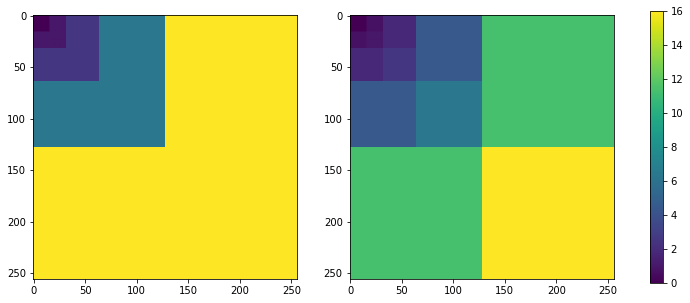

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
im = axs[0].imshow(steps_dwt)
axs[1].imshow(steps_dwt_root2)
fig.colorbar(im, ax=axs.ravel().tolist())

fig.savefig("img/final/quant-dwt.pdf")
